# Regression Task:
Apply any two models with bagging and any two models with pasting.
Apply any two models with AdaBoost boosting.
Apply one model with gradient boosting.
Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
Apply deep learning models covered in class

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('car_ad.csv',encoding='latin-1')

In [10]:
data.shape

(9023, 11)

In [11]:
data.head()

,car,price,body,miles,engV,engType,registration,year,model,drive,Age
0,Mercedes-Benz,99999.0,crossover,0,2.99,Diesel,yes,2016,GLE-Class,full,3
1,Mercedes-Benz,70999.0,crossover,0,2.20,Diesel,yes,2016,GLE-Class,full,3
2,BMW,63500.0,crossover,1,2.00,Diesel,yes,2016,X5,full,3
3,BMW,59900.0,crossover,30,2.00,Diesel,yes,2016,X5,full,3
4,Mitsubishi,9200.0,crossover,110,2.40,Petrol,yes,2006,Outlander,full,13


In [12]:
data.dtypes

car              object
price           float64
body             object
miles             int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
Age               int64
dtype: object

In [13]:
data.isnull().sum()

car               0
price             0
body              0
miles             0
engV            322
engType           0
registration      0
year              0
model             0
drive             0
Age               0
dtype: int64

In [14]:
data['engV'] = data['engV'].fillna(0)

In [15]:
data.isnull().sum()

car             0
price           0
body            0
miles           0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
Age             0
dtype: int64

In [16]:
data.shape

(9023, 11)

In [17]:
data.describe()

,price,miles,engV,year,Age
count,9023.000000,9023.000000,9023.000000,9023.000000,9023.000000
mean,15686.921183,139.403524,2.496261,2006.619639,12.380361
std,24201.595244,98.251834,5.351916,7.003076,7.003076
min,0.000000,0.000000,0.000000,1953.000000,3.000000
25%,5000.000000,70.000000,1.600000,2004.000000,7.000000
50%,9250.000000,128.000000,2.000000,2008.000000,11.000000
75%,16700.000000,195.000000,2.500000,2012.000000,15.000000
max,547800.000000,999.000000,99.990000,2016.000000,66.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9023 entries, 0 to 9022
Data columns (total 11 columns):
car             9023 non-null object
price           9023 non-null float64
body            9023 non-null object
miles           9023 non-null int64
engV            9023 non-null float64
engType         9023 non-null object
registration    9023 non-null object
year            9023 non-null int64
model           9023 non-null object
drive           9023 non-null object
Age             9023 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 775.5+ KB


In [19]:
# Get names of indexes for which column price has value 0
indexNames = data[ data['price'] == 0 ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

In [20]:
data.shape

(8776, 11)

In [21]:
data.describe()

,price,miles,engV,year,Age
count,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000
mean,16128.428651,140.969120,2.475426,2006.522903,12.477097
std,24394.311510,97.866995,5.321587,6.947925,6.947925
min,259.350000,0.000000,0.000000,1953.000000,3.000000
25%,5450.000000,73.000000,1.600000,2004.000000,8.000000
50%,9500.000000,130.000000,2.000000,2008.000000,11.000000
75%,17000.000000,196.000000,2.500000,2011.000000,15.000000
max,547800.000000,999.000000,99.990000,2016.000000,66.000000


In [22]:
#use random scaler for scaling

#correlation plot

Text(0.5,1,'Heatmap for Highest correlated features for Carsale datset')

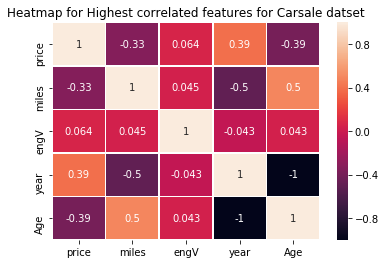

In [23]:
sns.heatmap(data.corr(),annot=True, linewidths=.5)
plt.title("Heatmap for Highest correlated features for Carsale datset")

# Visualize dataset

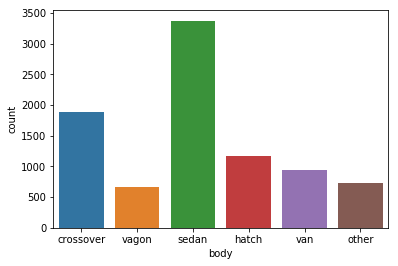

In [24]:
sns.countplot(data['body'])

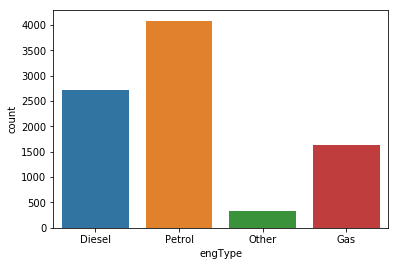

In [25]:
sns.countplot(data['engType'])

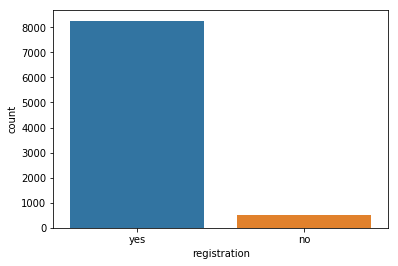

In [26]:
sns.countplot(data['registration'])

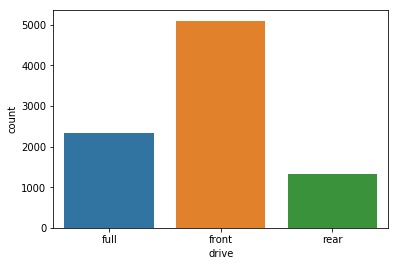

In [27]:
sns.countplot(data['drive'])

Text(0.5,1,'Top 10 car brands on sale')

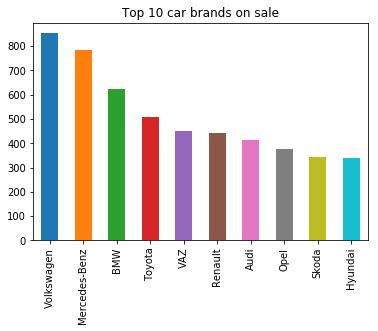

In [28]:
data.car.value_counts().head(10).plot.bar()
plt.title("Top 10 car brands on sale")

In [29]:
print(sns.__version__)

0.8.1


In [30]:
sns.lineplot(data=data, y='price', x='year', hue = 'drive')
plt.title("year - price line plot (1950 - 2010)")

AttributeError: module 'seaborn' has no attribute 'lineplot'

In [ ]:
sns.lineplot(data = data, x='miles',y='price')
plt.title("mileage - price line Plot")

Feature transformations

In [31]:
data['registration'] = data['registration'].map({'no':0, 'yes':1})

In [32]:
data.head()

,car,price,body,miles,engV,engType,registration,year,model,drive,Age
0,Mercedes-Benz,99999.0,crossover,0,2.99,Diesel,1,2016,GLE-Class,full,3
1,Mercedes-Benz,70999.0,crossover,0,2.20,Diesel,1,2016,GLE-Class,full,3
2,BMW,63500.0,crossover,1,2.00,Diesel,1,2016,X5,full,3
3,BMW,59900.0,crossover,30,2.00,Diesel,1,2016,X5,full,3
4,Mitsubishi,9200.0,crossover,110,2.40,Petrol,1,2006,Outlander,full,13


In [33]:
df = pd.get_dummies(data['body'])
data = pd.concat([data, df], axis = 1)
data.drop('body', axis = 1, inplace=True)

In [34]:
df = pd.get_dummies(data['engType'])
data = pd.concat([data, df], axis = 1)
data.drop('engType', axis = 1, inplace=True)

In [35]:
df = pd.get_dummies(data['drive'])
data = pd.concat([data, df], axis = 1)
data.drop('drive', axis = 1, inplace=True)

In [36]:
data.head()

,car,price,miles,engV,registration,year,model,Age,crossover,hatch,...,sedan,vagon,van,Diesel,Gas,Other,Petrol,front,full,rear
0,Mercedes-Benz,99999.0,0,2.99,1,2016,GLE-Class,3,1,0,...,0,0,0,1,0,0,0,0,1,0
1,Mercedes-Benz,70999.0,0,2.20,1,2016,GLE-Class,3,1,0,...,0,0,0,1,0,0,0,0,1,0
2,BMW,63500.0,1,2.00,1,2016,X5,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,BMW,59900.0,30,2.00,1,2016,X5,3,1,0,...,0,0,0,1,0,0,0,0,1,0
4,Mitsubishi,9200.0,110,2.40,1,2006,Outlander,13,1,0,...,0,0,0,0,0,0,1,0,1,0


In [37]:
data = data.drop(['car'], axis = 1)

In [38]:
data = data.drop(['model'], axis = 1)

In [39]:
#remove year
data = data.drop(['year'], axis = 1)

In [40]:
data = data[data['engV'] <= 6.75] 

In [41]:
data.head(10)

,price,miles,engV,registration,Age,crossover,hatch,other,sedan,vagon,van,Diesel,Gas,Other,Petrol,front,full,rear
0,99999.000,0,2.99,1,3,1,0,0,0,0,0,1,0,0,0,0,1,0
1,70999.000,0,2.20,1,3,1,0,0,0,0,0,1,0,0,0,0,1,0
2,63500.000,1,2.00,1,3,1,0,0,0,0,0,1,0,0,0,0,1,0
3,59900.000,30,2.00,1,3,1,0,0,0,0,0,1,0,0,0,0,1,0
4,9200.000,110,2.40,1,13,1,0,0,0,0,0,0,0,0,1,0,1,0
5,20241.897,0,1.60,1,4,1,0,0,0,0,0,0,0,0,1,1,0,0
6,14490.000,212,2.20,1,11,0,0,0,0,1,0,1,0,0,0,0,0,1
8,8999.000,120,1.90,1,12,0,0,0,1,0,0,1,0,0,0,1,0,0
9,3650.000,240,2.50,0,19,0,0,0,1,0,0,1,0,0,0,1,0,0
10,17000.000,38,0.00,1,6,0,1,0,0,0,0,0,0,1,0,1,0,0


In [42]:
data.shape

(8718, 18)

In [43]:
#Taking log of Price
data['price'] = np.log(data['price'])

In [44]:
data['price']

0       11.512915
1       11.170421
2       11.058795
3       11.000432
4        9.126959
5        9.915510
6        9.581214
8        9.104869
9        8.202482
10       9.740969
11       9.392662
12       9.934690
13      10.915088
14       9.798127
15       9.985068
16       7.783224
17       7.762171
18       9.830917
19      11.561706
20      12.180755
21      10.817776
22      10.837618
23      11.512915
26      11.542475
27      10.488493
28       9.711116
29      11.552137
30      11.651817
31      10.184900
32       9.472628
          ...    
8993     7.090077
8994     6.810941
8995     9.464983
8996    10.451609
8997     9.200189
8998    10.709963
8999     9.254357
9000     8.411833
9001     7.919356
9002     7.649693
9003     7.823646
9004     9.449357
9005     9.200290
9006     8.630522
9007     9.994242
9008     8.974618
9009     8.556414
9010     8.086410
9011     8.716044
9012     9.137770
9013     9.093807
9014     9.546098
9015     8.517193
9016     9.798127
9017     9

In [45]:
y = data['price']
X = data.drop(['price'], axis = 1)

In [46]:
X.head()

,miles,engV,registration,Age,crossover,hatch,other,sedan,vagon,van,Diesel,Gas,Other,Petrol,front,full,rear
0,0,2.99,1,3,1,0,0,0,0,0,1,0,0,0,0,1,0
1,0,2.20,1,3,1,0,0,0,0,0,1,0,0,0,0,1,0
2,1,2.00,1,3,1,0,0,0,0,0,1,0,0,0,0,1,0
3,30,2.00,1,3,1,0,0,0,0,0,1,0,0,0,0,1,0
4,110,2.40,1,13,1,0,0,0,0,0,0,0,0,1,0,1,0


In [47]:
y.head()

0    11.512915
1    11.170421
2    11.058795
3    11.000432
4     9.126959
Name: price, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
#step1: split dataset
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [49]:
#step2: scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)


In [50]:
X_train

array([[0.13513514, 0.2962963 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.27227227, 0.41481481, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08508509, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.10610611, 0.26666667, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.1011011 , 0.23703704, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.13813814, 0.20740741, 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [51]:
y_train

5801     9.350102
7537     8.779557
8032     9.268609
4859     8.455318
7310     8.895630
267      9.928180
617     11.350407
3366     8.802372
743     10.034516
161      9.862666
5477     9.047821
1933     8.779557
4530     8.999619
6074     7.207860
3814     9.304741
5083     7.824046
5537     8.268732
4503     7.863267
1046     9.047821
3034     9.846917
4832     8.556414
951      6.620073
6500     9.137770
279      9.825526
1916    10.491274
763      9.648595
7414     9.848638
6235     9.367344
3333    10.388995
8613     8.242756
          ...    
3345     8.229511
703      8.682708
847      8.377931
804      8.433594
8590     9.259131
2597     9.169518
7879     8.948976
1951     9.200290
2133    10.064713
8166     9.798127
5033     8.961879
5261     9.126959
2253     8.496990
6257     9.952230
7183     8.516993
6450     9.205328
573     10.594132
3007     7.972466
8056     7.003065
2314     8.974618
2702     8.942461
750      7.843849
3604     8.987197
6988     9.433484
6090     9

#step 2: scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

StandardScaler shows lot of negative values. So we will go with the MinMaxScaler

Text(0.5,1,'Price Distribution')

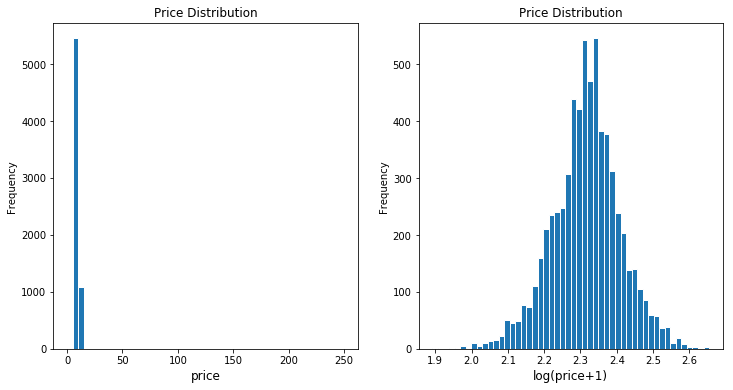

In [52]:
plt.subplot(1, 2, 1)
y_train.plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)
plt.subplot(1, 2, 2)
np.log(y_train+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

# K Neighbors Regressor

In [53]:
from sklearn.neighbors import KNeighborsRegressor

train_score = []
test_score = []

for k in range(1,20):
    knn = KNeighborsRegressor(n_neighbors= k)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    


In [54]:
#k = 9 is the best regressor
knn_reg = KNeighborsRegressor(9)
#step 4 cross validation
scores = cross_val_score(knn_reg, X_train, y_train)
print("Cross-validation train_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

scores = cross_val_score(knn_reg, X_test, y_test)
print("Cross-validation test_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))


NameError: name 'cross_val_score' is not defined

In [ ]:
train_score

In [ ]:
test_score

In [ ]:
%matplotlib inline

x_axis = range(1,20)
plt.plot(x_axis, train_score, label = 'Train score')
plt.plot(x_axis, test_score, label = 'Test score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy (score)')

n_neighbors = 9 closes gap but low train and test scores
 Best train_Score 0.894433965610485, test_Score 0.8285243082195128

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor

#1 - create the model
lreg = LinearRegression()

#2- train the model
lreg.fit(X_train, y_train)

#3- evaluate the model
print('Train score:', lreg.score(X_train, y_train))
print('Test score: ', lreg.score(X_test, y_test))
#step 4 cross validation
scores = cross_val_score(lreg, X_train, y_train)
print("Cross-validation train_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

scores = cross_val_score(lreg, X_test, y_test)
print("Cross-validation test_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

Low train and test scores. shows Underfitting

# SGD Regressor

In [ ]:
from sklearn.model_selection import cross_val_score
#step 1- create the model
sgd = SGDRegressor(max_iter= 5000)

#step 2- train the model
sgd.fit(X_train, y_train)

#step 3- evaluate the model
print('Train score:', sgd.score(X_train, y_train))
print('Test score: ', sgd.score(X_test, y_test))

#step 4 cross validation
scores = cross_val_score(lreg, X_train, y_train)
print("Cross-validation train_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

scores = cross_val_score(lreg, X_test, y_test)
print("Cross-validation test_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

In [ ]:
sgd.coef_

In [ ]:
sgd.intercept_

In [ ]:
sgd.n_iter_

The SGD model took 35 iterations to reach global minimum 

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter = 10000, learning_rate = 'optimal', penalty = 'l2')
sgd.fit(X_train, y_train)

In [ ]:
sgd.score(X_train, y_train)

In [ ]:
sgd.score(X_test, y_test)

Structure is not linear. It is Polynomial

In [ ]:
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()

scores = cross_val_score(lreg, X_train, y_train, cv = 11)

In [ ]:
scores

In [ ]:
scores.mean()

# Ridge Regression

In [55]:
from sklearn.linear_model import Ridge
x_range = [0.01, 0.1, 1, 10]

train_score_list = []
test_score_list = []

for alpha in x_range:
    ridge = Ridge(alpha)
    ridge.fit(X_train, y_train)
    train_score_list.append(ridge.score(X_train, y_train))
    test_score_list.append(ridge.score(X_test, y_test))
    

In [56]:
train_score_list

[0.7773835629072454,
 0.7773827508720172,
 0.7773045683147312,
 0.7716486112072907]

In [57]:
test_score_list

[0.792909229497664, 0.7928705501859253, 0.7924288929001646, 0.784240631286332]

Text(0.5,0,'$\\alpha$')

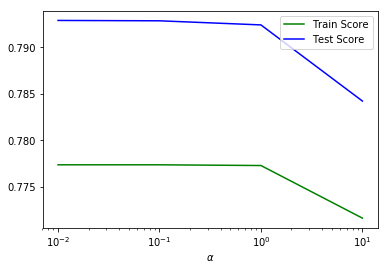

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 1) ###loc = 3 means lower left
plt.xlabel(r'$\alpha$')

In [59]:
#as for every value of alpha the test and train scores are almost similar....Lets as choose alpha = 0.1 for CV
ridge = Ridge(0.1)

scores = cross_val_score(ridge, X_train, y_train)
print("Cross-validation train_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

scores = cross_val_score(ridge, X_test, y_test)
print("Cross-validation test_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

NameError: name 'cross_val_score' is not defined

In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

alpha = 0.1 gives the best fit

In [60]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.7773
Test score: 0.7924


In [61]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.7774
Test score: 0.7929


In [62]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.7774
Test score: 0.7929


alpha = 0.01 and 0.1 gives almost same score(better than 1)

In [63]:
ridge.coef_

array([-0.53924552,  2.12588364,  0.7681241 , -5.11621585,  0.08483918,
       -0.01763281,  0.07630903,  0.0332425 , -0.03171883, -0.14503907,
        0.11150046, -0.22208461,  0.22014058, -0.10955643, -0.25981023,
        0.1763789 ,  0.08343133])

In [64]:
ridge.intercept_

8.75216747011912

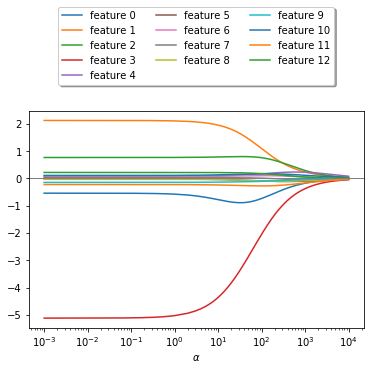

In [65]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# LASSO 

In [66]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10]
train_score_list = []
test_score_list = []

for alpha in x_range:
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)
    train_score_list.append(lasso.score(X_train, y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [67]:
train_score_list

[0.752270859097809, 0.20574031889812683, 0.0, 0.0]

In [68]:
test_score_list

[0.7668027159137368,
 0.21419237594851925,
 -0.0017589119185832391,
 -0.0017589119185832391]

Text(0.5,0,'$\\alpha$')

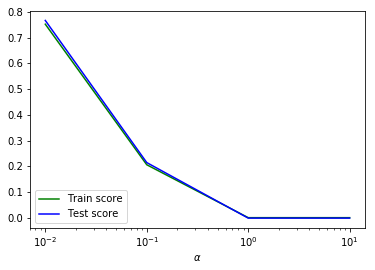

In [69]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [70]:
#let alpha = 0.1 for CV
lasso = Lasso(0.1)
scores = cross_val_score(lasso, X_train, y_train)
print("Cross-validation train_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

scores = cross_val_score(lasso, X_test, y_test)
print("Cross-validation test_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

NameError: name 'cross_val_score' is not defined

In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

alpha = 0.01 gives best fit but low scores

In [ ]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

In [ ]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Polynomial Regression

In [ ]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,5].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [ ]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [ ]:
print(train_score_list)
print(test_score_list)

In [ ]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,5].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

# SVM

In [ ]:
from sklearn.svm import SVR
svr_kernel = SVR( kernel = "rbf")
svr_kernel.fit(X_train,y_train)

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for gamma in x_range: 
    svr_kernel = SVR(gamma = gamma, kernel = "rbf")
    svr_kernel.fit(X_train,y_train)
    train_score_list.append(svr_kernel.score(X_train,y_train))
    test_score_list.append(svr_kernel.score(X_test, y_test))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\gamma$')

In [ ]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for gamma in x_range: 
    svr_kernel = SVR(gamma = 0.1,C = gamma , kernel = "rbf")
    svr_kernel.fit(X_train,y_train)
    train_score_list.append(svr_kernel.score(X_train,y_train))
    test_score_list.append(svr_kernel.score(X_test, y_test))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)


In [ ]:
# gamma = 0.1 and C = 1  we get the optimal scores 
svr_kernel = SVR(gamma = 0.1,C = 1 , kernel = "rbf")

#CV
scores = cross_val_score(svr_kernel, X_train, y_train)
print("Cross-validation train_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

scores = cross_val_score(svr_kernel, X_test, y_test)
print("Cross-validation test_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Bagging with Linear SVM

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
lreg = LinearRegression()
bag_rgr = BaggingRegressor(lreg, n_estimators=1000, max_samples=1000, bootstrap=True, random_state=0)
bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)
print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))


# Bagging with K Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
bag_rgr = BaggingRegressor(knn_reg, n_estimators=1000, max_samples=1000, bootstrap=True, random_state=0)
bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)

print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))

# Pasting with linear regressor

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

lreg = LinearRegression()
bag_rgr = BaggingRegressor(lreg, n_estimators=1000, max_samples=1000, bootstrap=False, random_state=0)

bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)

print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.78
Test score: 0.79


# Pasting with K Neighbors Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
bag_rgr = BaggingRegressor(knn_reg, n_estimators=1000, max_samples=1000, bootstrap=False, random_state=0)
bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)


print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))

# ADA Boost using K Neighbors Regressor

In [ ]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

knn_reg = KNeighborsRegressor()

from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(knn_reg, n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

# ADA boost using Ridge

In [ ]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

from  sklearn.linear_model import Ridge
ridge = Ridge()

from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(ridge, n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

# Gradient boosting on K Neighbour Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

In [ ]:
gbrt = GradientBoostingRegressor(random_state=0, max_depth=3, learning_rate=0.1 , n_estimators=100)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

# PCA

In [ ]:
X.shape

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)

In [ ]:
X_train_reduced.shape

In [ ]:
X_test_reduced = pca.transform(X_test)

# PCA with K Neighbour Regressor

In [ ]:
knn_reg.fit(X_train_reduced, y_train)

In [ ]:
print('Train score: ', knn_reg.score(X_train_reduced, y_train))
print('Test score: ', knn_reg.score(X_test_reduced, y_test))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_reg.predict(X_test_reduced))
accuracy

In [ ]:
precision = precision_score(y_test, knn_reg.predict(X_test_reduced))
precision


In [ ]:
recall = recall_score(y_test, knn_reg.predict(X_test_reduced))
recall

In [ ]:
f1 = f1_score(y_test, knn_reg.predict(X_test_reduced))
f1

In [ ]:
auc = roc_auc_score(y_test, knn_reg.predict(X_test_reduced))
auc

In [ ]:
PCA_results = pd.DataFrame(columns=('S.No','Model_Name','Train_score','Test_Score', 'Accuracy','precision','recall','f1','AUC'))

In [ ]:
PCA_results.loc[len(PCA_results)]=[1,'PCA - Knn',knn_reg.score(X_train_reduced, y_train),knn_reg.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]

In [ ]:
PCA_results

# PCA with linear regressor

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)

In [ ]:
X_train_reduced.shape

In [ ]:
lreg.fit(X_train_reduced, y_train)

In [ ]:
print('Train score: ', lreg.score(X_train_reduced, y_train))
print('Test score: ', lreg.score(X_test_reduced, y_test))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, lreg.predict(X_test_reduced))
accuracy

In [ ]:
precision = precision_score(y_test, lreg.predict(X_test_reduced))
precision

In [ ]:
recall = recall_score(y_test, lreg.predict(X_test_reduced))
recall

In [ ]:
f1 = f1_score(y_test, lreg.predict(X_test_reduced))
f1


In [ ]:
auc = roc_auc_score(y_test, lreg.predict(X_test_reduced))
auc

In [ ]:
PCA_results.loc[len(PCA_results)]=[2,'Linear regressor',lreg.score(X_train_reduced, y_train),lreg.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]


In [ ]:
PCA_results

# PCA with SGD regressor

In [ ]:
sgd.fit(X_train, y_train)

In [ ]:
print('Train score: ', sgd.score(X_train, y_train))
print('Test score: ', sgd.score(X_test, y_test))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, sgd.predict(X_test))
accuracy

In [ ]:
precision = precision_score(y_test, sgd.predict(X_test))
precision

In [ ]:
recall = recall_score(y_test, sgd.predict(X_test))
recall

In [ ]:
f1 = f1_score(y_test, sgd.predict(X_test))
f1

In [ ]:
auc = roc_auc_score(y_test, sgd.predict(X_test))
auc

In [ ]:
PCA_results.loc[len(PCA_results)]=[3,'SGD Regressor',sgd.score(X_train, y_train),sgd.score(X_test, y_test), accuracy, precision, recall, f1, auc]
PCA_results

# PCA with ridge

In [ ]:
ridge.fit(X_train, y_train)
   

In [ ]:
print('Train score: ', ridge.score(X_train, y_train))
print('Test score: ', ridge.score(X_test, y_test))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, ridge.predict(X_test))
accuracy

In [ ]:
precision = precision_score(y_test, ridge.predict(X_test))
precision

In [ ]:
recall = recall_score(y_test, ridge.predict(X_test))
recall

In [ ]:
f1 = f1_score(y_test, ridge.predict(X_test))
f1

In [ ]:
auc = roc_auc_score(y_test, ridge.predict(X_test))
auc

In [ ]:
PCA_results.loc[len(PCA_results)]=[4,'Ridge',ridge.score(X_train, y_train),ridge.score(X_test, y_test), accuracy, precision, recall, f1, auc]
PCA_results

# PCA with Lasso

In [ ]:
lasso.fit(X_train, y_train)

In [ ]:
print('Train score: ', lasso.score(X_train, y_train))
print('Test score: ', lasso.score(X_test, y_test))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, lasso.predict(X_test))
accuracy

In [ ]:
precision = precision_score(y_test, lasso.predict(X_test))
precision

In [ ]:
recall = recall_score(y_test, lasso.predict(X_test))
recall

In [ ]:
f1 = f1_score(y_test, lasso.predict(X_test))
f1

In [ ]:
auc = roc_auc_score(y_test, lasso.predict(X_test))
auc

In [ ]:
PCA_results.loc[len(PCA_results)]=[5,'Lasso',lasso.score(X_train, y_train),lasso.score(X_test, y_test), accuracy, precision, recall, f1, auc]
PCA_results

# PCA with SVM Kernel

In [ ]:
svr_kernel.fit(X_train,y_train)

In [ ]:
print('Train score: ', svr_kernel.score(X_train, y_train))
print('Test score: ', svr_kernel.score(X_test, y_test))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, svr_kernel.predict(X_test))
accuracy

In [ ]:
precision = precision_score(y_test, svr_kernel.predict(X_test))
precision

In [ ]:
recall = recall_score(y_test, svr_kernel.predict(X_test))
recall

In [ ]:
f1 = f1_score(y_test, svr_kernel.predict(X_test))
f1

In [ ]:
auc = roc_auc_score(y_test, svr_kernel.predict(X_test))
auc

In [ ]:
PCA_results.loc[len(PCA_results)]=[6,'SVM Kernel',svr_kernel.score(X_train, y_train),svr_kernel.score(X_test, y_test), accuracy, precision, recall, f1, auc]


In [ ]:
PCA_results

# Deep neural network

In [ ]:
%matplotlib inline
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
from matplotlib import pyplot as plt

plt.imshow(X_train[10])


In [ ]:
X_train.shape

In [ ]:
X_train[10]

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 28, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'mse' , optimizer = 'adam',metrics = ['mse'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 10, batch_size = 400)

In [ ]:
# Step 4: Model evaluation


loss_and_metrics = model1.evaluate(X_test, Y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])


In [ ]:
predicted_classes = model1.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")